#  `Data Mining II: Assignment-01`


- **By:** Mayank Kumar
- **Course:** Computer Science (Hons)
- **SEM:** V

###### Date: 29-08-2024

In [142]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
import matplotlib.pyplot as plt

In [143]:
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [144]:
# Load and standardize the data
data = load_iris()
X = StandardScaler().fit_transform(data.data)
y_true = data.target

# Number of clusters
K = len( np.unique(y_true))

## Kmeans
<small>Use Simple K-means algorithm for clustering on any dataset. Compare the performance of clusters by changing the initialization parameters (rand, kmeans++, fixed) involved in the algorithm. Compare the SSE and weighted purity of these three clustering schemes.</small>

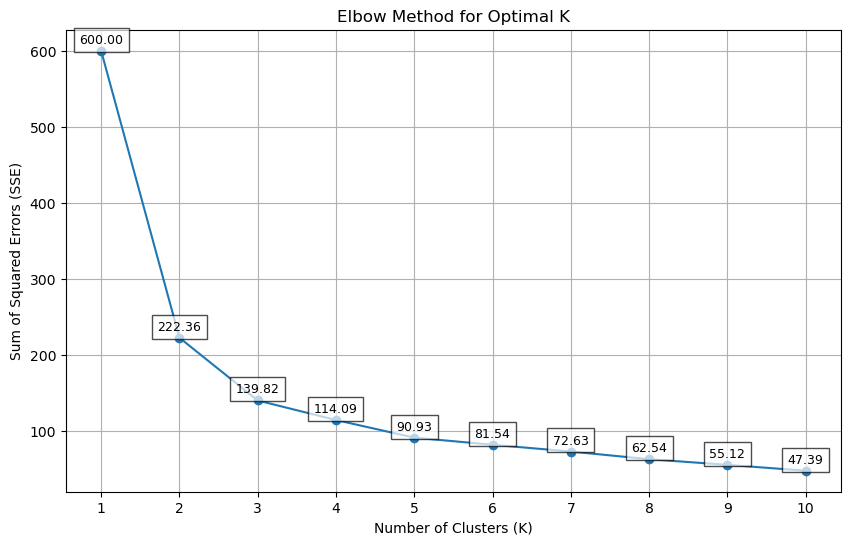

In [145]:
sse = []
K_values = range(1, 11) 

for K in K_values:
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  


plt.figure(figsize=(10, 6))
plt.plot(K_values, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(K_values)
plt.grid()

for i, value in enumerate(sse):
    plt.annotate(f'{value:.2f}', 
                 xy=(K_values[i], value), 
                 xytext=(K_values[i], value + 10), 
                 fontsize=9,
                 ha='center',
                 bbox=dict(facecolor='white', alpha=0.7))

plt.show()

### Initialization

In [146]:
# Initialization methods for KMeans
methods = [
    'random',
    'k-means++',
    np.array([[5.0, 3.6, 1.4, 0.2],  
               [6.7, 3.14, 4.7, 1.5],  
               [5.9, 3.0, 5.1, 1.8]])  
]
K = len( np.unique(y_true))

def k_weighted_purity(y_true, y_pred, K):
    purity = 0
    for i in range(K):
        cluster_indices = np.where(y_pred == i)
        cluster_labels = y_true[cluster_indices]
        if len(cluster_labels) > 0: 
            majority_label, count = mode(cluster_labels)
            purity += count.item() 
    purity /= len(y_true)  
    return purity

results = []

# Perform KMeans clustering for each method
for method in methods:
    if isinstance(method, str):
        kmeans = KMeans(n_clusters=K, init=method, n_init=10, random_state=42)
    else:
        kmeans = KMeans(n_clusters=K, init=method, n_init=1, max_iter=30)

    y_pred = kmeans.fit_predict(X)
    sse = kmeans.inertia_

    
    purity = k_weighted_purity(y_true, y_pred, K)

    results.append((method, sse, purity))


for result in results:
    print(f"Initialization Method: {result[0]}")
    print(f"SSE: {result[1]}")
    print(f"Weighted Purity: {result[2]:.4f}\n")


Initialization Method: random
SSE: 139.82543466174204
Weighted Purity: 0.8267

Initialization Method: k-means++
SSE: 139.82049635974982
Weighted Purity: 0.8333

Initialization Method: [[5.   3.6  1.4  0.2 ]
 [6.7  3.14 4.7  1.5 ]
 [5.9  3.   5.1  1.8 ]]
SSE: 140.90153181202444
Weighted Purity: 0.8533



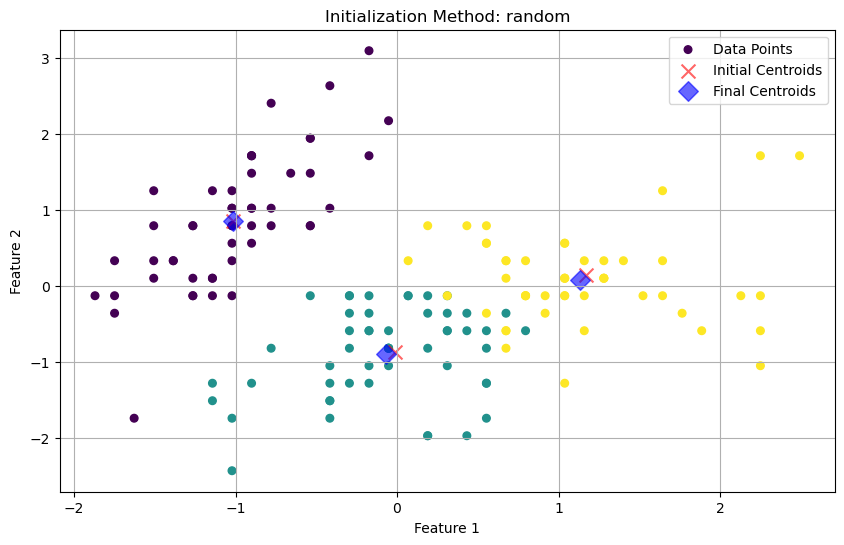

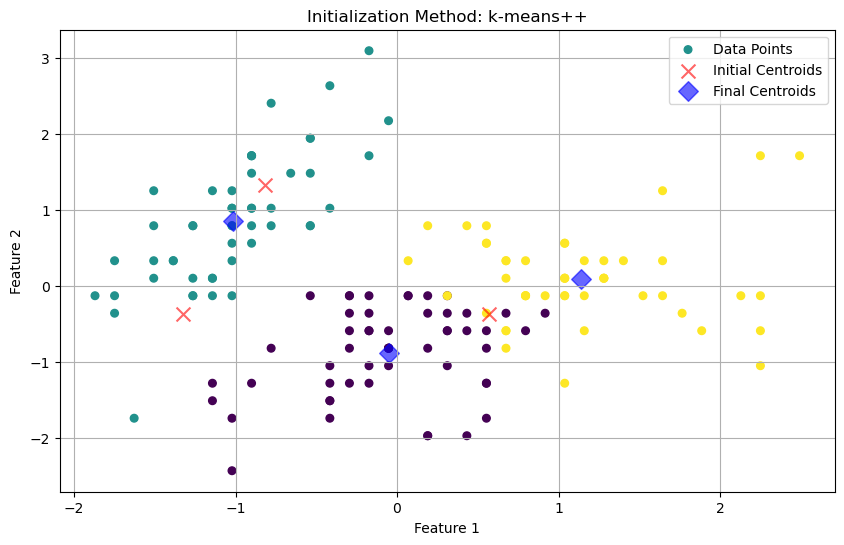

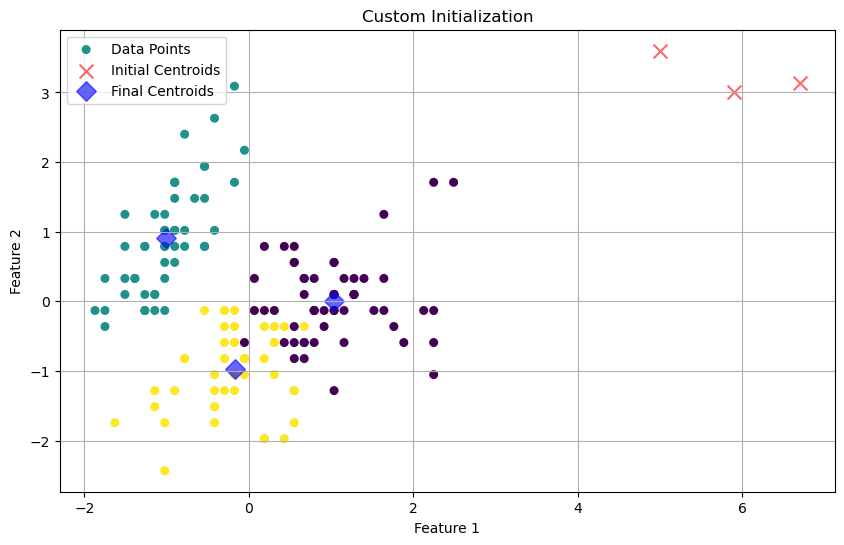

Initialization Method: random
SSE: 139.82543466174204
Weighted Purity: 0.8266666666666667

Initialization Method: k-means++
SSE: 139.82049635974982
Weighted Purity: 0.8333333333333334

Initialization Method: [[5.   3.6  1.4  0.2 ]
 [6.7  3.14 4.7  1.5 ]
 [5.9  3.   5.1  1.8 ]]
SSE: 140.90153181202444
Weighted Purity: 0.8533333333333334



In [147]:

results = []
for idx, method in enumerate(methods):
    if isinstance(method, str):
        kmeans = KMeans(n_clusters=K, init=method, n_init=10, random_state=42)
    else:
        kmeans = KMeans(n_clusters=K, init=method, n_init=1, max_iter=300)
    
    y_pred = kmeans.fit_predict(X)
    sse = kmeans.inertia_

    purity = k_weighted_purity(y_true, y_pred, K)
    results.append((method, sse, purity)) 

    # Get initial and final centroids
    if isinstance(method, str):
        initial_kmeans = KMeans(n_clusters=K, init=method, n_init=1, random_state=42)
        initial_kmeans.fit(X)  #
        init_centroids = initial_kmeans.cluster_centers_  # Get initial centroids
    else:
        init_centroids = method 
    
    final_centroids = kmeans.cluster_centers_  
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, marker='o', label='Data Points')
    
    # Plot initial centroids
    plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids', alpha=0.6)
    
    # Plot final centroids
    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='blue', marker='D', s=100, label='Final Centroids', alpha=0.6)
    
    plt.title(f'Initialization Method: {method}' if isinstance(method, str) else 'Custom Initialization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()


for result in results:
    print(f"Initialization Method: {result[0]}")
    print(f"SSE: {result[1]}")
    print(f"Weighted Purity: {result[2]}\n")

## Hierarchical Agglomerative Clustering
<small>
Use Iris/ Dry Bean Dataset/Wine dataset to apply Hierarchical agglomerative clustering and plot the dendrogram</small>

### Scaled

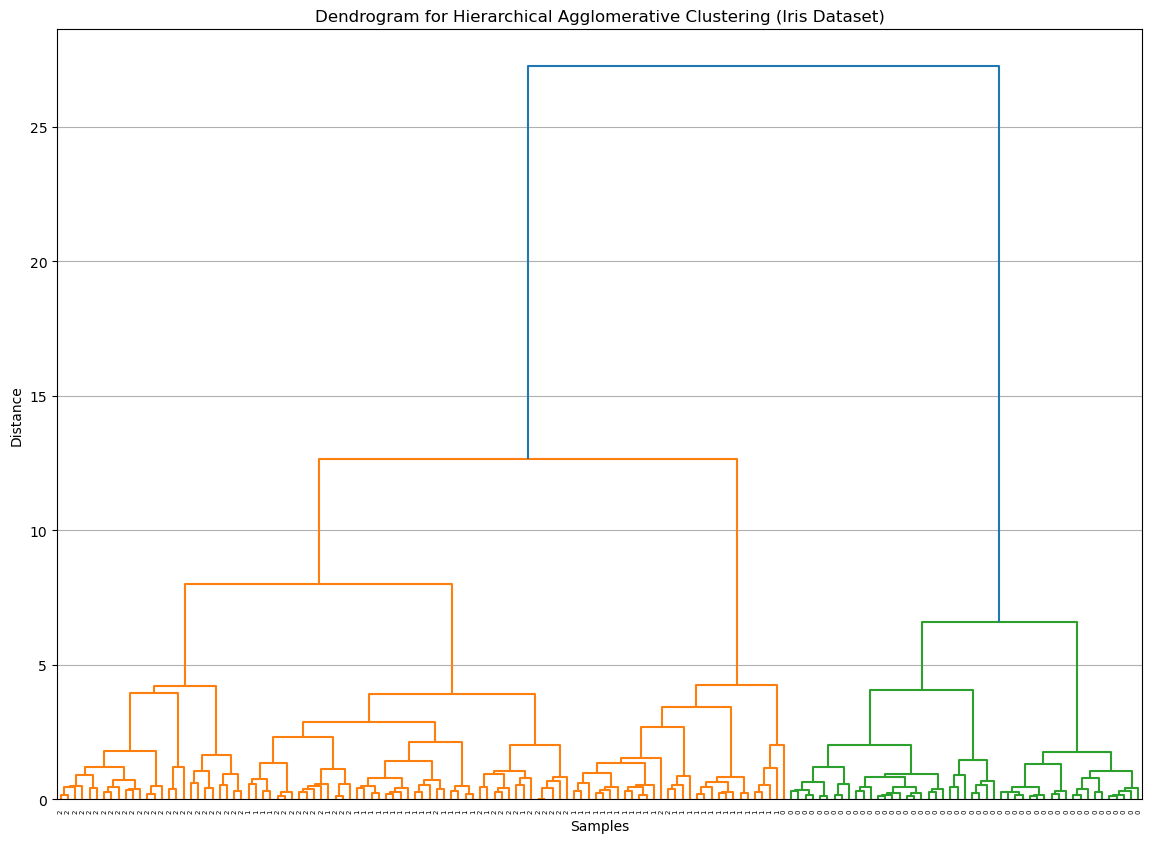

In [148]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# dataset Iris
linked = linkage(X, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 10))
dendrogram(linked, orientation='top', labels=y_true, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(axis='y')
plt.show()

## Unscaled

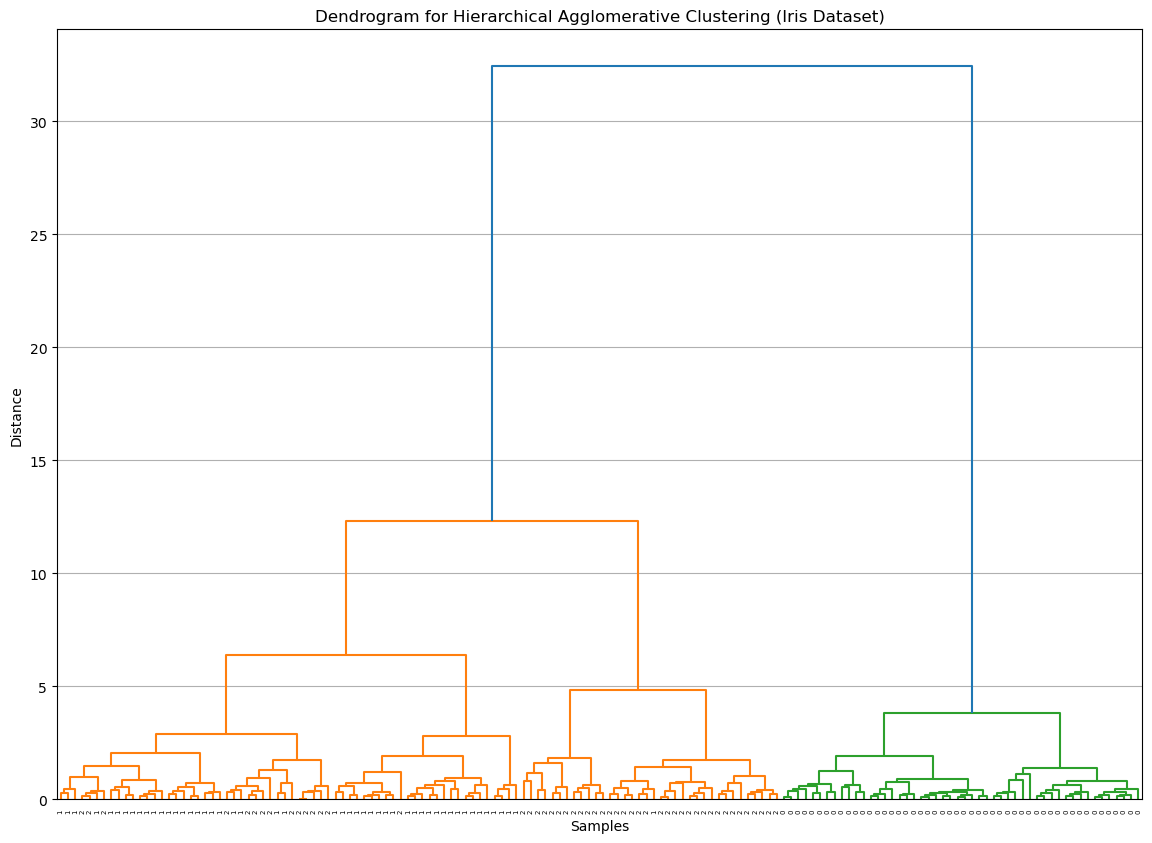

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# dataset Iris
linked = linkage(data.data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 10))
dendrogram(linked, orientation='top', labels=y_true, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(axis='y')
plt.show()

<small> supporting functions<small>

In [150]:
from scipy.stats import entropy

def calculate_entropy(contingency_matrix):
    total_points = contingency_matrix.values.sum()
    entropy_value = 0
    for cluster in contingency_matrix.index:
        cluster_total = contingency_matrix.loc[cluster].sum()
        if cluster_total > 0:
            probabilities = contingency_matrix.loc[cluster] / cluster_total
            entropy_value += entropy(probabilities, base=2) * (cluster_total / total_points)
    return entropy_value

def calculate_entropy_per_cluster(contingency_matrix):
    entropy_values = []
    for cluster in contingency_matrix.index:
        cluster_total = contingency_matrix.loc[cluster].sum()
        if cluster_total > 0:
            probabilities = contingency_matrix.loc[cluster] / cluster_total
            cluster_entropy = entropy(probabilities, base=2)
            entropy_values.append(cluster_entropy)
        else:
            entropy_values.append(0)
    return entropy_values

def calculate_weighted_purity(contingency_matrix):
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)

def calculate_metrics(contingency_matrix):
    precision_list = []
    recall_list = []
    f_measure_list = []

    for cluster in contingency_matrix.index:
        for label in contingency_matrix.columns:
            m_ij = contingency_matrix.loc[cluster, label]  # Relevant retrieved instances
            m_i = contingency_matrix.loc[cluster].sum()  # All retrieved instances
            m_j = contingency_matrix[label].sum()  # All relevant instances

            precision = m_ij / m_i if m_i > 0 else 0
            recall = m_ij / m_j if m_j > 0 else 0
            
            f_measure = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0

            precision_list.append(precision)
            recall_list.append(recall)
            f_measure_list.append(f_measure)

    return np.array(precision_list).reshape(len(contingency_matrix.index), len(contingency_matrix.columns)), \
           np.array(recall_list).reshape(len(contingency_matrix.index), len(contingency_matrix.columns)), \
           np.array(f_measure_list).reshape(len(contingency_matrix.index), len(contingency_matrix.columns))

def display_results(contingency_matrix, entropy_per_cluster):
    print("\nCluster Evaluation Results")
    print("-" * 80)
    print(f"{'Cluster':<10} {'0':<5} {'1':<5} {'2':<5} {'Total':<7} {'Purity':<10} {'Entropy':<10}")
    print("-" * 80)

    for cluster in contingency_matrix.index:
        row = contingency_matrix.loc[cluster].values
        total_cluster_size = contingency_matrix.loc[cluster].sum()
        purity = max(row) / total_cluster_size if total_cluster_size > 0 else 0
        cluster_entropy = entropy_per_cluster[cluster]
        print(f"{f'Cluster {cluster}':<10} {row[0]:<5} {row[1]:<5} {row[2]:<5} {total_cluster_size:<7} {purity:<10.4f} {cluster_entropy:<10.4f}")

    # Total points in each true label
    total_labels = contingency_matrix.sum(axis=0).tolist() + [contingency_matrix.values.sum()]
    print("\nTotal Points in Each Label:", total_labels[:-1], "Total:", total_labels[-1])



In [151]:
from sklearn.cluster import AgglomerativeClustering

true_labels = y_true
data = pd.DataFrame(data= data.data, columns=data.feature_names)
def perform_agglomerative_clustering(n_clusters):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(data_scaled)

    # Compute the contingency matrix
    contingency_matrix = pd.crosstab(cluster_labels, true_labels, rownames=['Cluster'], colnames=['True Label'])
   

    # Compute Entropy
    overall_entropy = calculate_entropy(contingency_matrix)
    entropy_per_cluster = calculate_entropy_per_cluster(contingency_matrix)

    print(f"\nOverall Entropy: {overall_entropy:.4f}")

    # Compute Weighted Purity
    weighted_purity = calculate_weighted_purity(contingency_matrix)
    print(f"Weighted Purity: {weighted_purity:.4f}")

    # Compute Precision, Recall, and F-measure
    precision_matrix, recall_matrix, f_measure_matrix = calculate_metrics(contingency_matrix)

   
    average_f_measures = np.mean(f_measure_matrix, axis=0)
    global_f_measure = np.mean(average_f_measures)

   
    print("\nPrecision Matrix:")
    print(precision_matrix)
    print("\nRecall Matrix:")
    print(recall_matrix)
    print("\nF-measure Matrix:")
    print(f_measure_matrix)
    print(f"\nGlobal F-measure: {global_f_measure:.4f}")
    display_results(contingency_matrix, entropy_per_cluster)



#### Call

In [152]:
n_clusters = 3 
perform_agglomerative_clustering(n_clusters)


Overall Entropy: 0.5422
Weighted Purity: 0.8267

Precision Matrix:
[[0.         0.32394366 0.67605634]
 [1.         0.         0.        ]
 [0.03333333 0.9        0.06666667]]

Recall Matrix:
[[0.   0.46 0.96]
 [0.98 0.   0.  ]
 [0.02 0.54 0.04]]

F-measure Matrix:
[[0.         0.38016529 0.79338843]
 [0.98989899 0.         0.        ]
 [0.025      0.675      0.05      ]]

Global F-measure: 0.3237

Cluster Evaluation Results
--------------------------------------------------------------------------------
Cluster    0     1     2     Total   Purity     Entropy   
--------------------------------------------------------------------------------
Cluster 0  0     23    48    71      0.6761     0.9086    
Cluster 1  49    0     0     49      1.0000     0.0000    
Cluster 2  1     27    2     30      0.9000     0.5608    

Total Points in Each Label: [50, 50, 50] Total: 150


## DBSCAN
<small> Apply DBSCAN on the dataset having class labels and plot F-measure for different values of epsilon to show its impact on clustering scheme. Sim, vary minimum-points and note the change in weighted purity  on the same dataset by plotting bar plot. Display number of outliers detected in each case<small>

In [153]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_iris)

# Parameter ranges
epsilons = np.linspace(0.1, 2.1, 20)  
min_samples = np.arange(2, 6)

f_measures = []
weighted_purities = []
outlier_counts = []


def evaluate_dbscan(data, true_labels, epsilons, min_samples):
    results = []
    for eps in epsilons:
        for min_pts in min_samples:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_pts)
            cluster_labels = dbscan.fit_predict(data)
            
            # Filter out noise points
            valid_labels = cluster_labels[cluster_labels != -1]
            valid_true_labels = true_labels[cluster_labels != -1]
            
            if len(valid_labels) > 0:
                contingency_matrix = pd.crosstab(valid_labels, valid_true_labels,
                                                  rownames=['Cluster'], 
                                                  colnames=['True Label'])
                weighted_purity = calculate_weighted_purity(contingency_matrix)
                f_measure = f1_score(valid_true_labels, valid_labels, average='weighted')
                outliers = np.sum(cluster_labels == -1)
            else:
                weighted_purity = 0
                f_measure = 0
                outliers = len(true_labels)
                
            results.append((f_measure, weighted_purity, outliers))
    return results

# Evaluate DBSCAN
results = evaluate_dbscan(data_scaled, true_labels, epsilons, min_samples)
f_measures, weighted_purities, outlier_counts = zip(*results)

# Convert metrics to array
f_measures = np.array(f_measures)
weighted_purities = np.array([wp.mean() if isinstance(wp, pd.Series) else wp for wp in weighted_purities])
outlier_counts = np.array(outlier_counts)


num_eps = len(epsilons)
num_min_samples = len(min_samples)

f_measures = f_measures.reshape(num_eps, num_min_samples)
weighted_purities = weighted_purities.reshape(num_eps, num_min_samples)
outlier_counts = outlier_counts.reshape(num_eps, num_min_samples)

# print(f"F-measures shape: {f_measures.shape}")
# print(f"Weighted Purities shape: {weighted_purities.shape}")
# print(f"Outlier Counts shape: {outlier_counts.shape}")


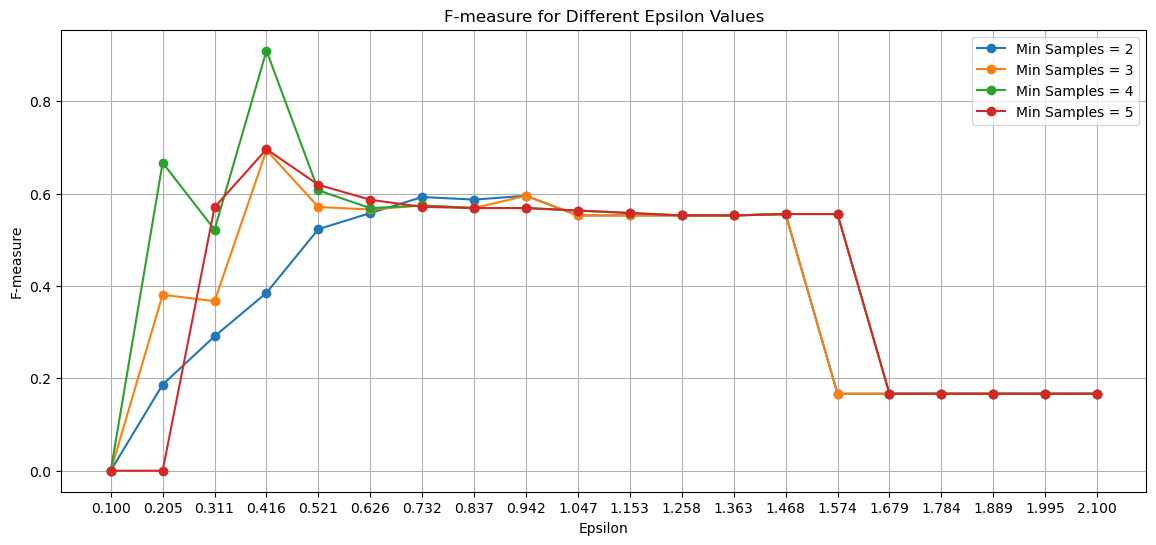

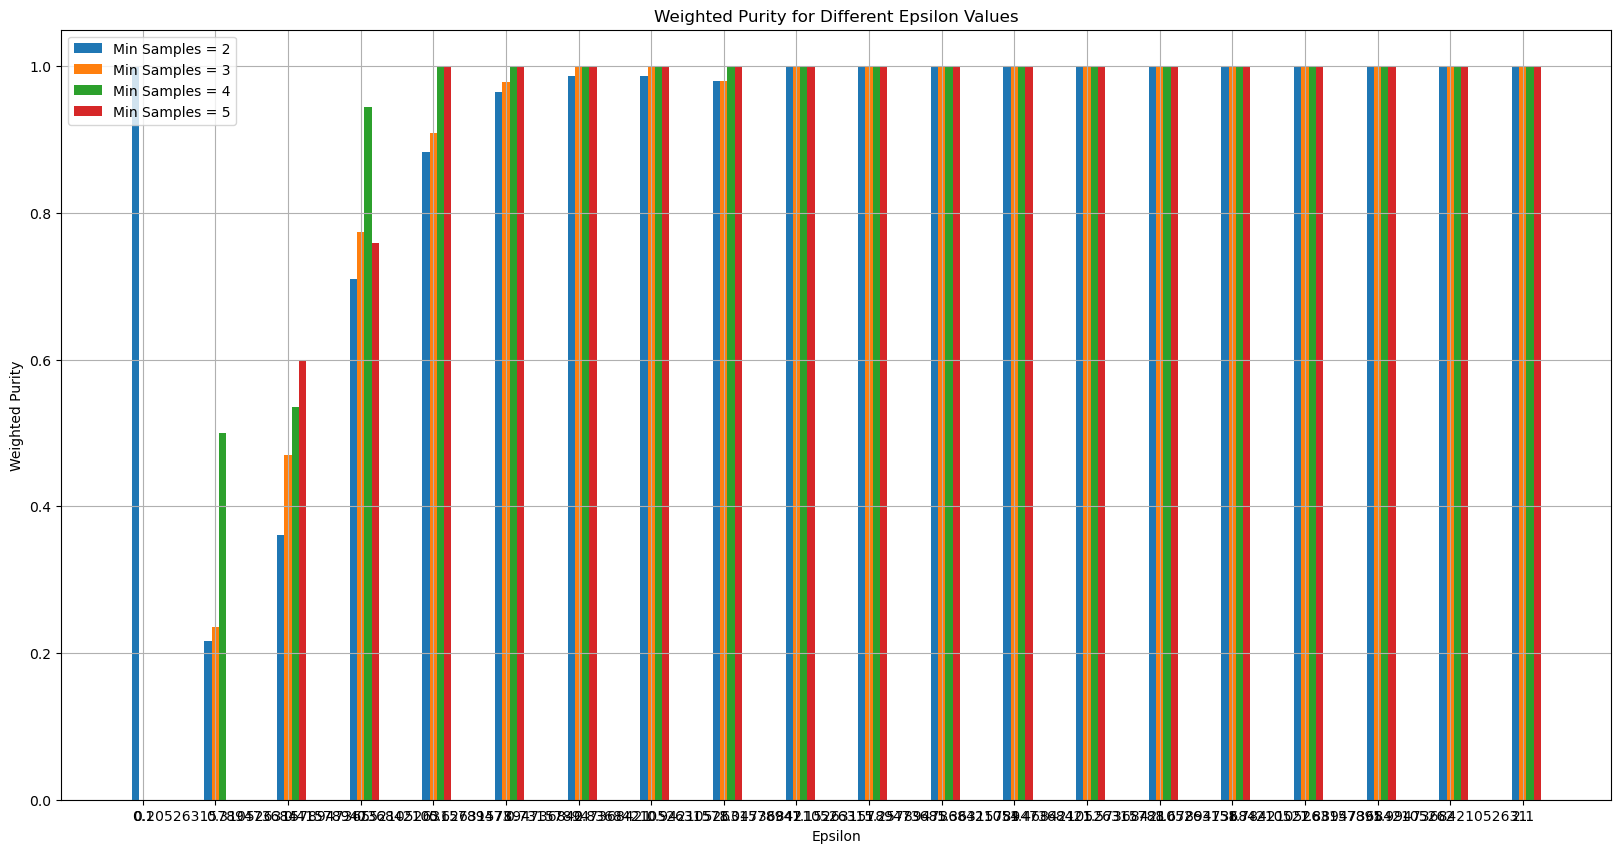

In [174]:
# Plot F-measure for different epsilons
plt.figure(figsize=(14, 6))
for i in range(num_min_samples):
    plt.plot(epsilons, f_measures[:, i], marker='o', label=f'Min Samples = {min_samples[i]}')
plt.title('F-measure for Different Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('F-measure')
plt.xticks(epsilons)
plt.legend()
plt.grid()
plt.show()

# Plot Weighted Purity for different epsilons
plt.figure(figsize=(20, 10))
bar_width = 0.1
indices = np.arange(num_eps)
for i in range(num_min_samples):
    plt.bar(indices + i * bar_width, weighted_purities[:, i], width=bar_width, label=f'Min Samples = {min_samples[i]}')
plt.title('Weighted Purity for Different Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('Weighted Purity')
plt.xticks(indices + bar_width, epsilons)
plt.legend()
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

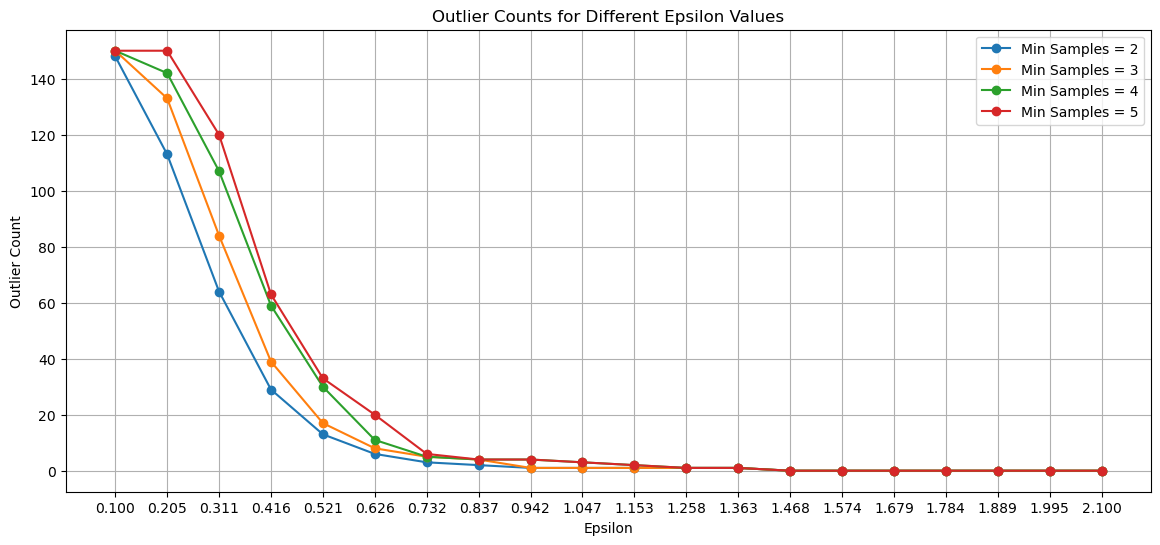

In [155]:
plt.figure(figsize=(14, 6))
for i in range(len(min_samples)):
    plt.plot(epsilons, outlier_counts[:, i], marker='o', label=f'Min Samples = {min_samples[i]}')

plt.title('Outlier Counts for Different Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('Outlier Count')
plt.xticks(epsilons)
plt.legend()
plt.grid()
plt.show

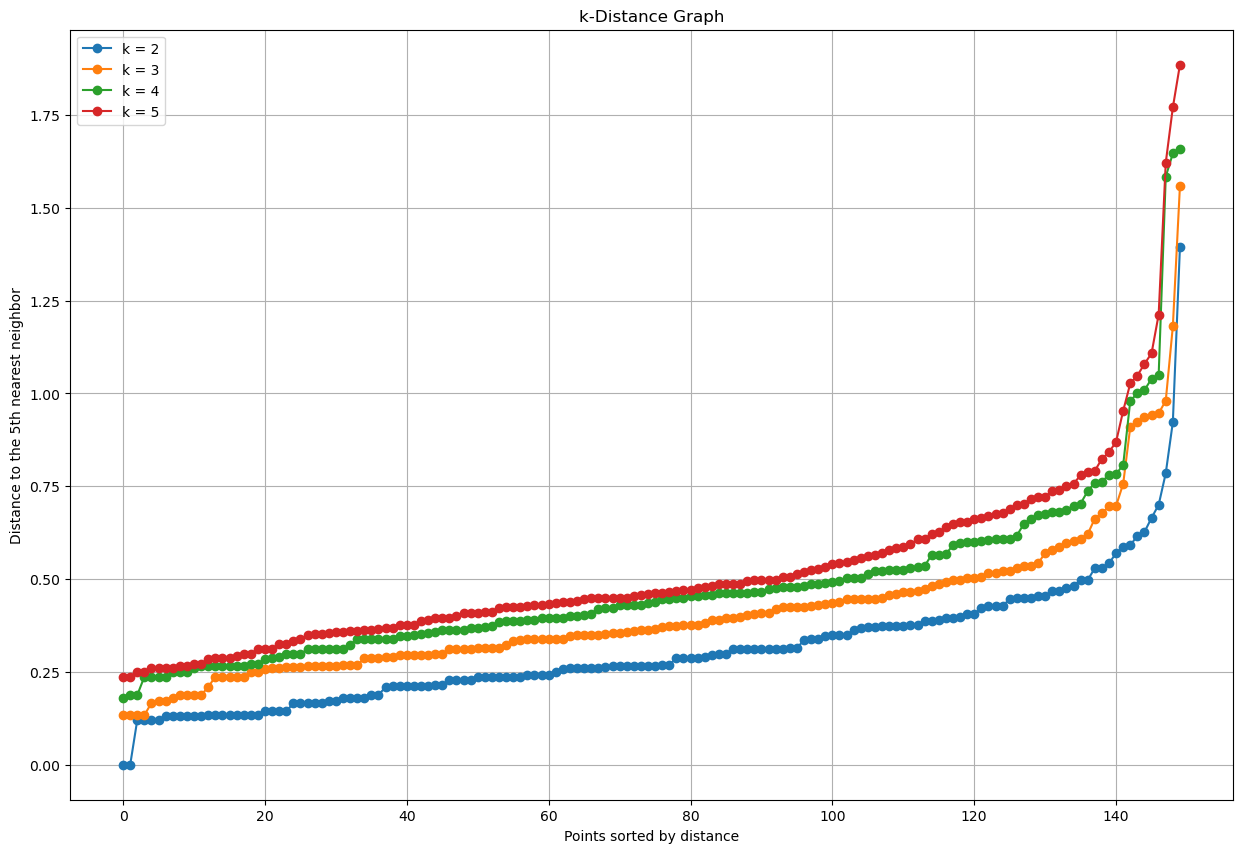

In [156]:
from sklearn.neighbors import NearestNeighbors

# Calculate k-distance for each k
plt.figure(figsize=(15, 10))
for k in min_samples:
    
    nbrs = NearestNeighbors(n_neighbors=k).fit(data_scaled)
    distances, indices = nbrs.kneighbors(data_scaled)
    
    k_distance = distances[:, -1]  
    k_distance.sort()  

    
    plt.plot(range(len(k_distance)), k_distance, marker='o', label=f'k = {k}')

plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to the {k}th nearest neighbor')
plt.legend()
plt.grid()
plt.show()

## Comparison of clustering algorithms
<small> Compare the clustering output of these three clustering algorithms (kmeans/Agglomerative/DBSCAN) using bar plot on a labelled dataset considering optimal parameter setting for each.<small>

Optimal Parametrs
KMeans K = 3
Agglomerative Clustering n = 3, cut at 12.4 units distance
DBSCAN eps = 0.416, min_samples = 4

### Scaled

In [187]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
 
# Contingency matrix for KMeans
kmeans_contingency = pd.crosstab(kmeans_labels, true_labels, rownames=['Cluster'], colnames=['True Label'])
kmeans_weighted_purity = calculate_weighted_purity(kmeans_contingency)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Contingency matrix for Agglomerative
agglo_contingency = pd.crosstab(agglo_labels, true_labels, rownames=['Cluster'], colnames=['True Label'])
agglo_weighted_purity = calculate_weighted_purity(agglo_contingency)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.416, min_samples=4) 
dbscan_labels = dbscan.fit_predict(data_scaled)

# Contingency matrix for DBSCAN (excluding noise points)
dbscan_contingency = pd.crosstab(dbscan_labels[dbscan_labels != -1], true_labels[dbscan_labels != -1],
                                  rownames=['Cluster'], colnames=['True Label'])
dbscan_weighted_purity = calculate_weighted_purity(dbscan_contingency)


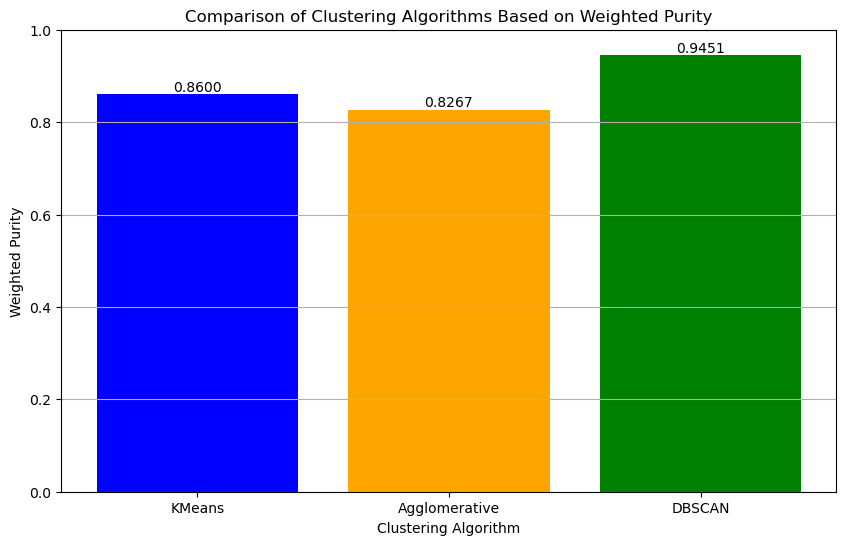

Weighted Purities:
KMeans Weighted Purity: 0.8600
Agglomerative Weighted Purity: 0.8267
DBSCAN Weighted Purity: 0.9451


In [188]:
algorithms = ['KMeans', 'Agglomerative', 'DBSCAN']
purities = [kmeans_weighted_purity, agglo_weighted_purity, dbscan_weighted_purity]


plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, purities, color=['blue', 'orange', 'green'])
plt.title('Comparison of Clustering Algorithms Based on Weighted Purity')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Weighted Purity')
plt.ylim(0, 1) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


print("Weighted Purities:")
print(f"KMeans Weighted Purity: {kmeans_weighted_purity:.4f}")
print(f"Agglomerative Weighted Purity: {agglo_weighted_purity:.4f}")
print(f"DBSCAN Weighted Purity: {dbscan_weighted_purity:.4f}")


In [190]:
print(kmeans_contingency)
print(agglo_contingency)
print(dbscan_contingency)

True Label   0   1   2
Cluster               
0            0  46  50
1           33   0   0
2           17   4   0
True Label   0   1   2
Cluster               
0            0  23  48
1           49   0   0
2            1  27   2
True Label   0   1  2
Cluster              
0           41   0  0
1            0  36  1
2            0   0  4
3            0   0  9


### Unscaled

In [191]:
iris_data = load_iris()
X_iris = iris_data.data

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_iris)

# Contingency matrix for KMeans
kmeans_contingency = pd.crosstab(kmeans_labels, true_labels, rownames=['Cluster'], colnames=['True Label'])
kmeans_weighted_purity = calculate_weighted_purity(kmeans_contingency)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_iris)

# Contingency matrix for Agglomerative
agglo_contingency = pd.crosstab(agglo_labels, true_labels, rownames=['Cluster'], colnames=['True Label'])
agglo_weighted_purity = calculate_weighted_purity(agglo_contingency)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.416, min_samples=4) 
dbscan_labels = dbscan.fit_predict(X_iris)

# Contingency matrix for DBSCAN (excluding noise points)
valid_dbscan_labels = dbscan_labels[dbscan_labels != -1]
valid_true_labels = true_labels[dbscan_labels != -1]
dbscan_contingency = pd.crosstab(valid_dbscan_labels, valid_true_labels,
                                  rownames=['Cluster'], colnames=['True Label'])
dbscan_weighted_purity = calculate_weighted_purity(dbscan_contingency)

Purities: [0.8866666666666667, 0.8933333333333333, 0.968503937007874]


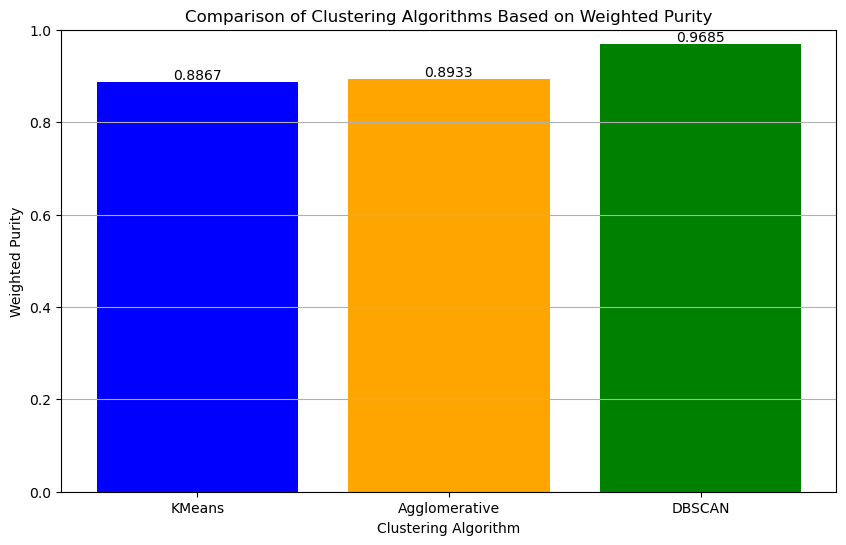

Weighted Purities:
KMeans Weighted Purity: 0.8867
Agglomerative Weighted Purity: 0.8933
DBSCAN Weighted Purity: 0.9685


In [192]:
algorithms = ['KMeans', 'Agglomerative', 'DBSCAN']
purities = [kmeans_weighted_purity, agglo_weighted_purity, dbscan_weighted_purity]

print("Purities:", purities)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, purities, color=['blue', 'orange', 'green'])
plt.title('Comparison of Clustering Algorithms Based on Weighted Purity')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Weighted Purity')
plt.ylim(0, 1) 
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

# Print weighted purities
print("Weighted Purities:")
print(f"KMeans Weighted Purity: {kmeans_weighted_purity:.4f}")
print(f"Agglomerative Weighted Purity: {agglo_weighted_purity:.4f}")
print(f"DBSCAN Weighted Purity: {dbscan_weighted_purity:.4f}")


In [193]:
print(kmeans_contingency)
print(agglo_contingency)
print(dbscan_contingency)


True Label   0   1   2
Cluster               
0            0   3  36
1           50   0   0
2            0  47  14
True Label   0   1   2
Cluster               
0            0  49  15
1           50   0   0
2            0   1  35
True Label   0   1   2
Cluster               
0           48   0   0
1            0  41  34
2            0   4   0
